In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [4]:
pd.pandas.set_option('display.max_columns', None)

In [5]:
house_df = pd.read_csv('../input/house-prices-dataset/train.csv')
house_df.shape

(1460, 81)

In [6]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
features_with_na = [features for features in house_df.columns if house_df[features].isnull().sum()>0]
for feature in features_with_na:
    print(feature, 'has   ', np.round(house_df[feature].isnull().mean()*100, 2), '%    missing values')

LotFrontage has    17.74 %    missing values
Alley has    93.77 %    missing values
MasVnrType has    0.55 %    missing values
MasVnrArea has    0.55 %    missing values
BsmtQual has    2.53 %    missing values
BsmtCond has    2.53 %    missing values
BsmtExposure has    2.6 %    missing values
BsmtFinType1 has    2.53 %    missing values
BsmtFinType2 has    2.6 %    missing values
Electrical has    0.07 %    missing values
FireplaceQu has    47.26 %    missing values
GarageType has    5.55 %    missing values
GarageYrBlt has    5.55 %    missing values
GarageFinish has    5.55 %    missing values
GarageQual has    5.55 %    missing values
GarageCond has    5.55 %    missing values
PoolQC has    99.52 %    missing values
Fence has    80.75 %    missing values
MiscFeature has    96.3 %    missing values


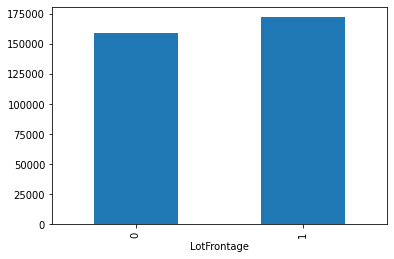

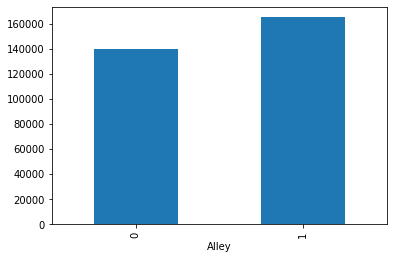

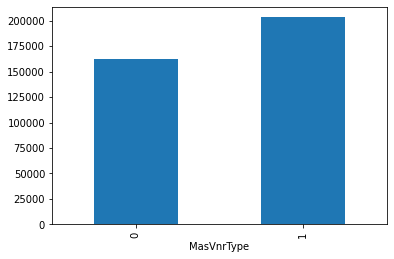

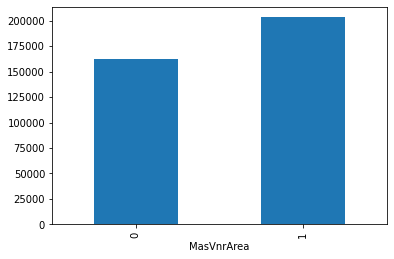

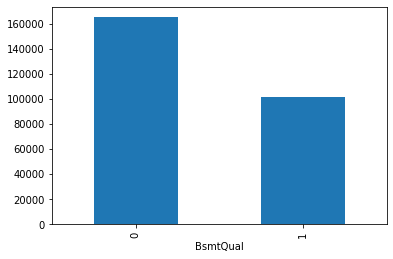

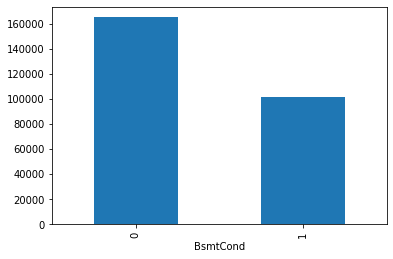

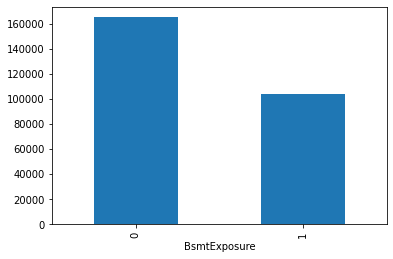

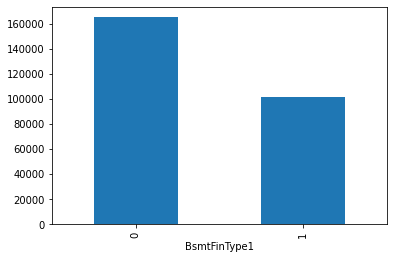

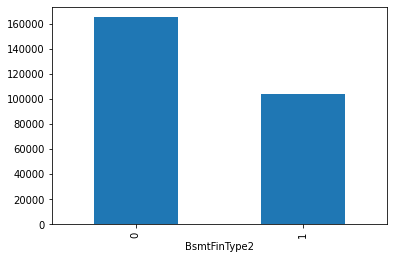

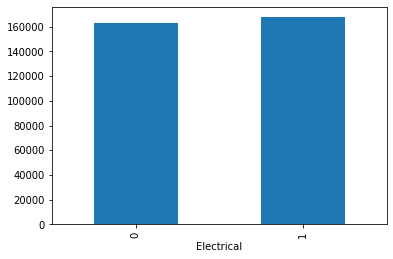

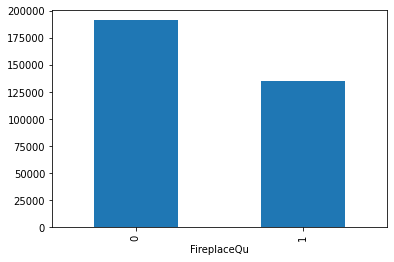

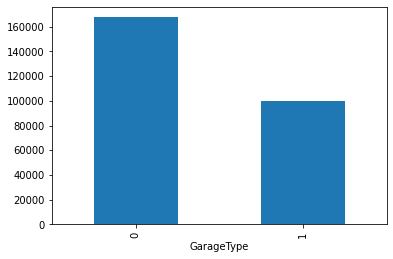

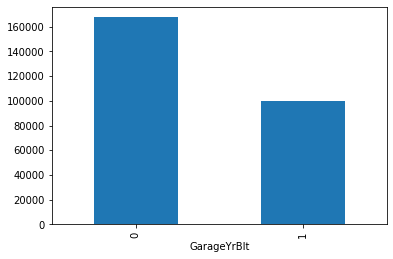

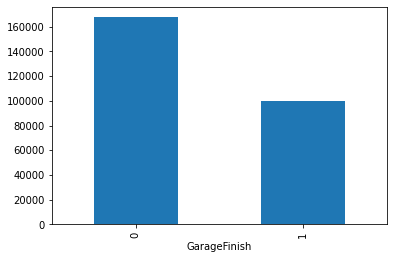

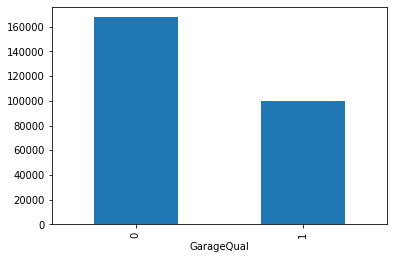

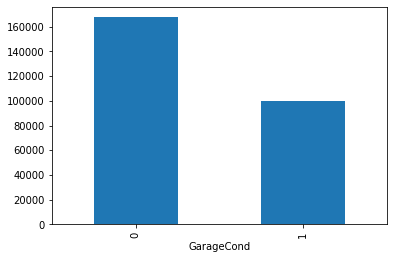

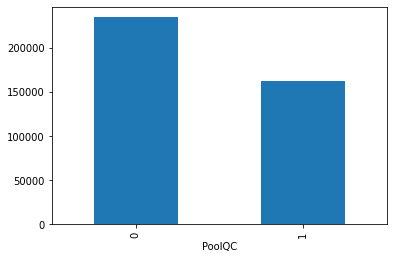

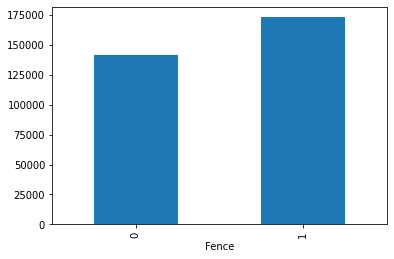

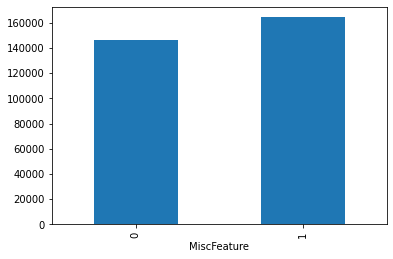

In [8]:
for feature in features_with_na:
    df = house_df.copy()
    df[feature] = np.where(df[feature].isnull(), 1, 0)
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()

In [9]:
len(house_df['Id'])

1460

In [10]:
numerical_features = [feature for feature in house_df.columns if house_df[feature].dtype != 'O']
len(numerical_features)

38

In [11]:
house_df[numerical_features]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


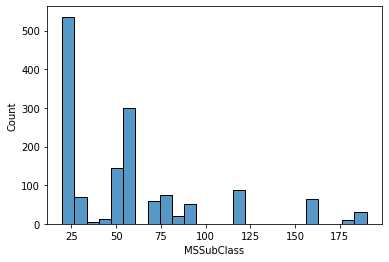

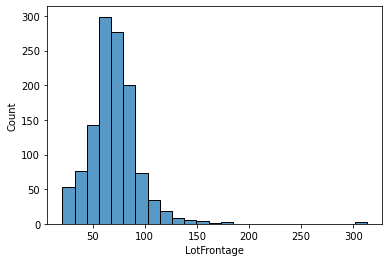

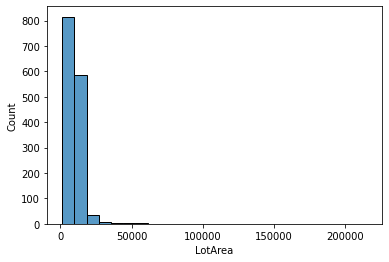

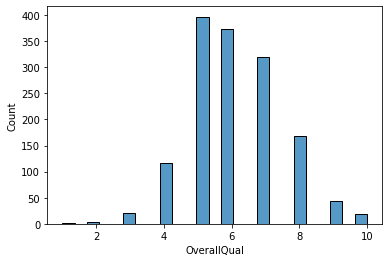

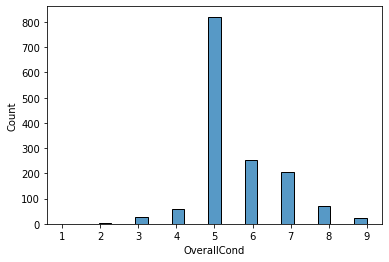

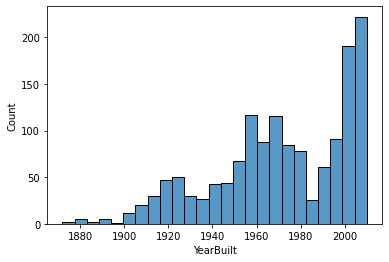

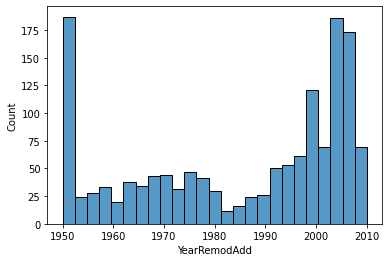

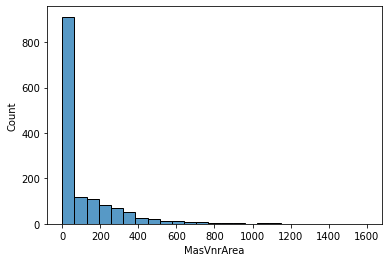

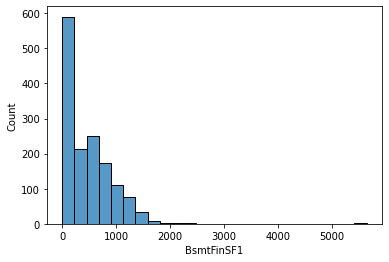

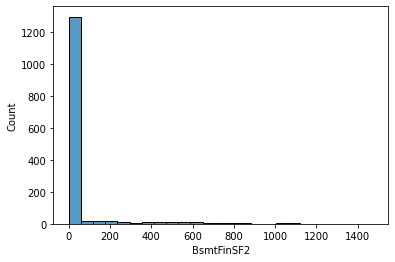

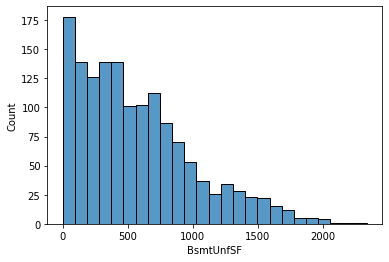

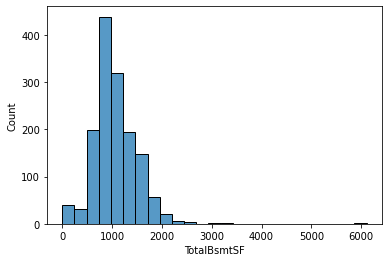

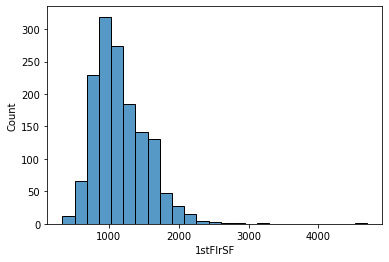

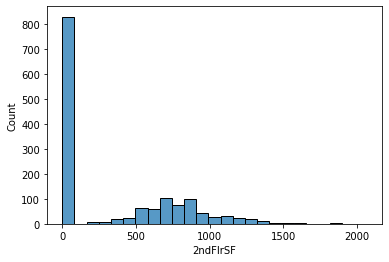

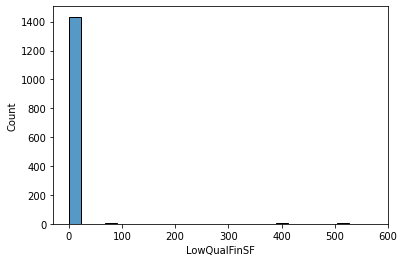

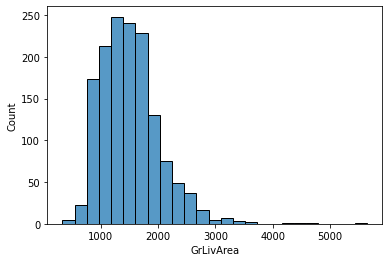

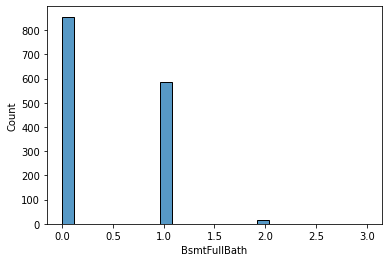

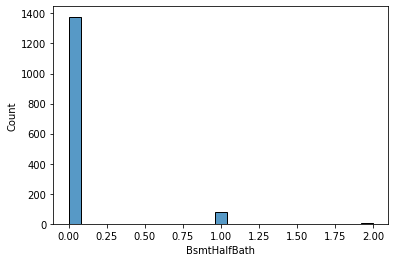

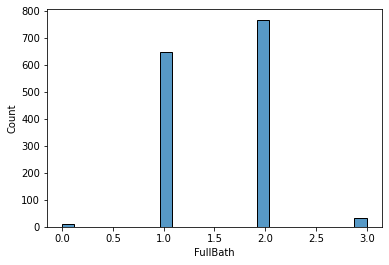

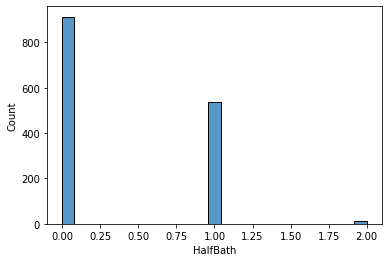

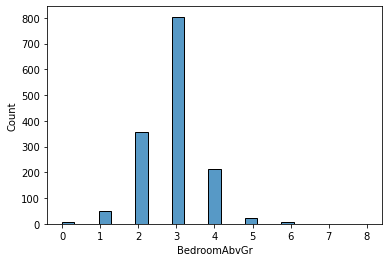

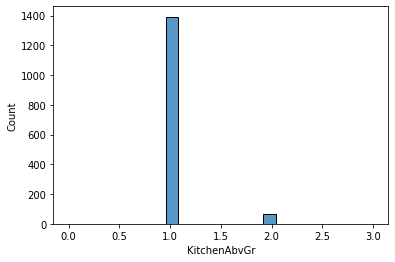

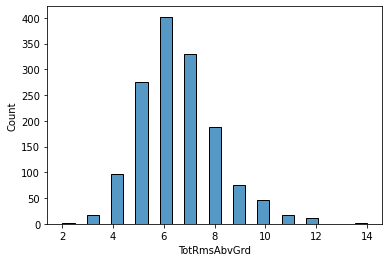

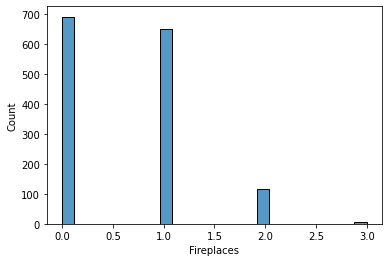

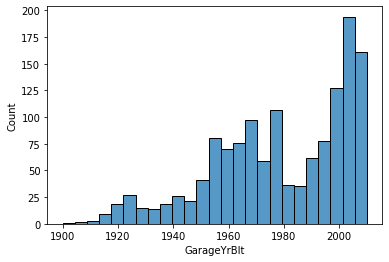

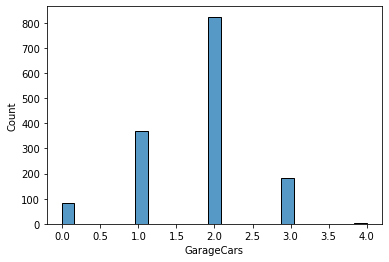

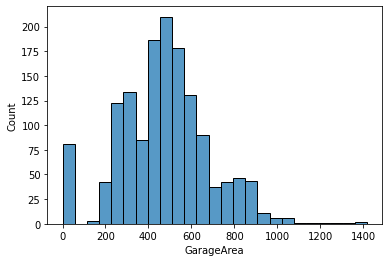

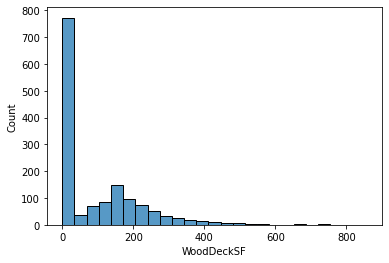

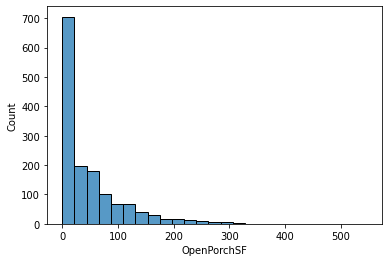

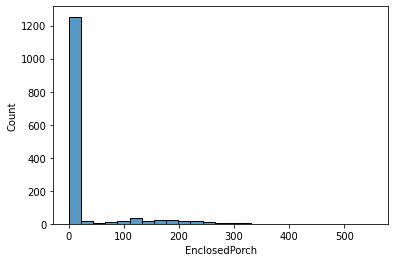

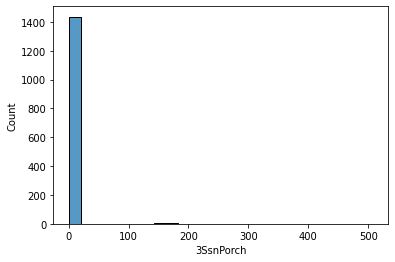

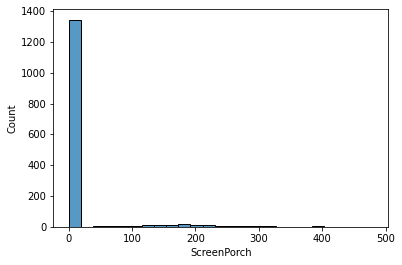

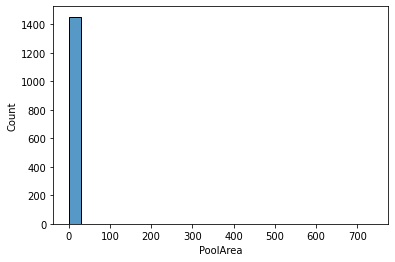

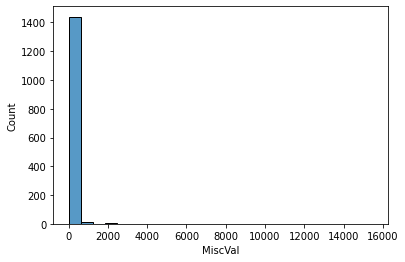

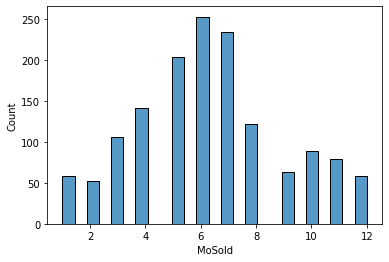

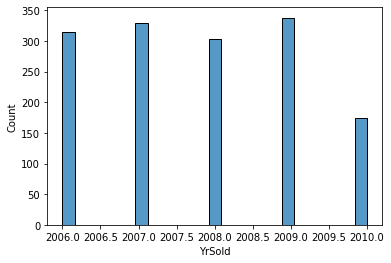

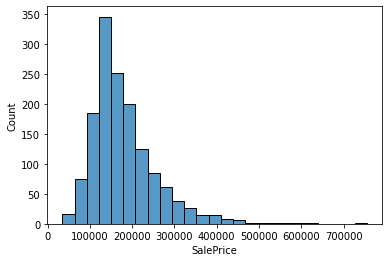

In [12]:
for feature in numerical_features:
    if feature != 'Id':
        df = house_df.copy()
        sns.histplot(df[feature], bins=25)
        plt.show()

In [13]:
year_features = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
house_df[year_features]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


Text(0, 0.5, 'Sale Price')

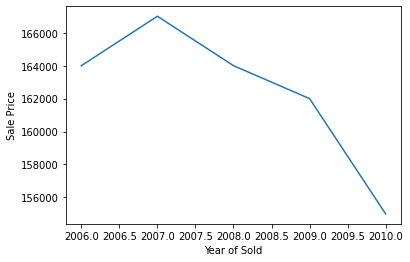

In [15]:
house_df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year of Sold')
plt.ylabel('Sale Price')

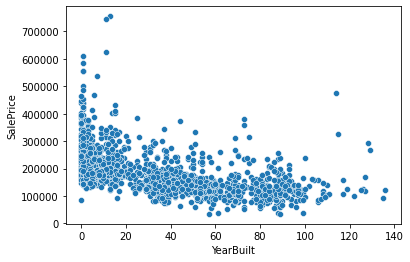

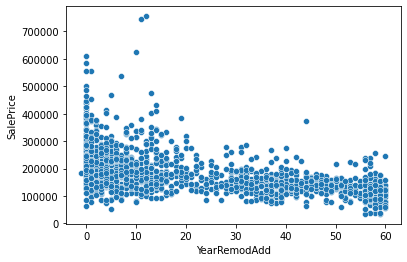

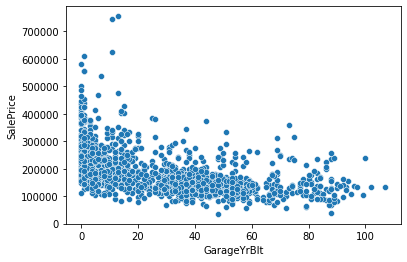

In [16]:
for feature in year_features:
    if feature != 'YrSold':
        df = house_df.copy()
        sns.scatterplot(x = df['YrSold']-df[feature], y = df['SalePrice'])
        plt.xlabel(feature)
        plt.show()

In [17]:
discrete_features = [feature for feature in numerical_features if len(house_df[feature].unique())<25 and feature not in year_features+['Id']]
house_df[discrete_features]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


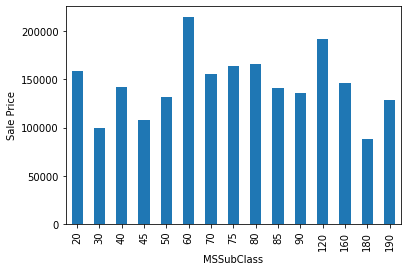

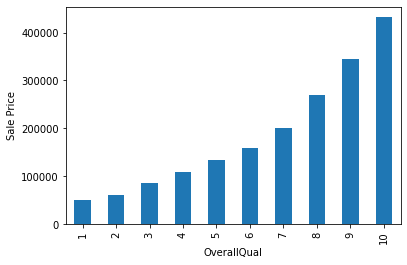

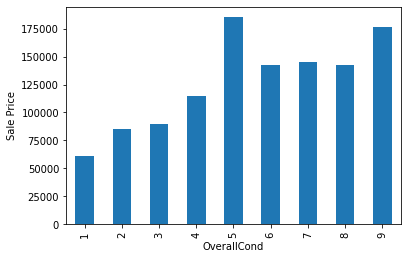

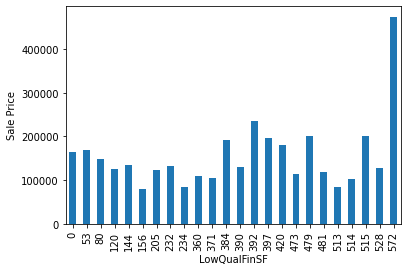

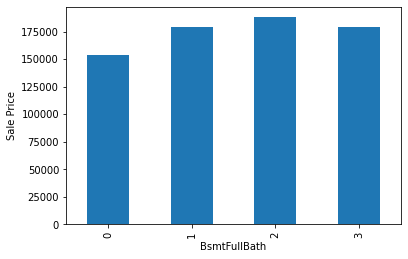

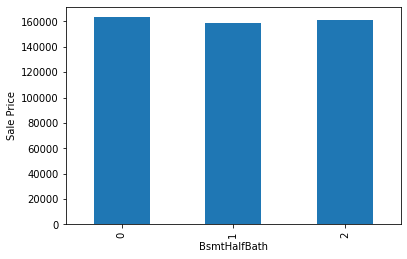

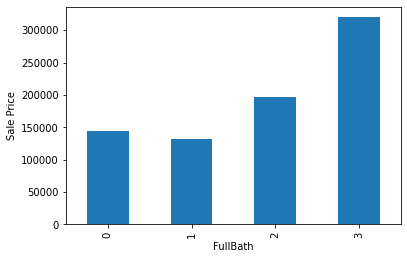

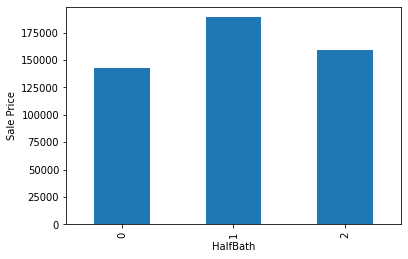

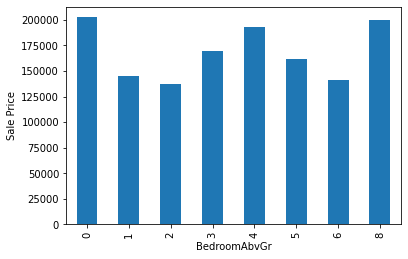

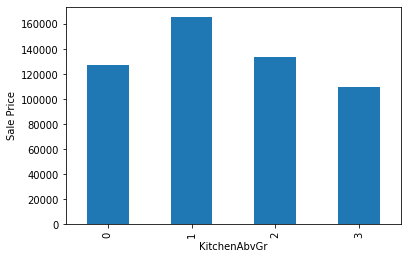

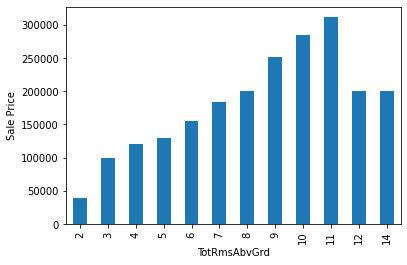

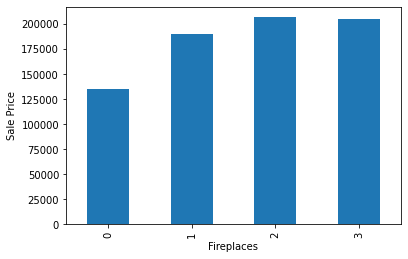

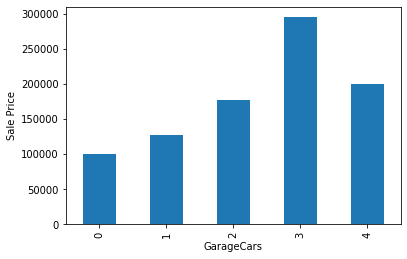

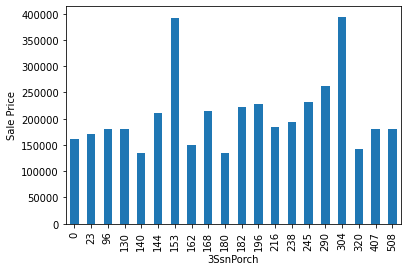

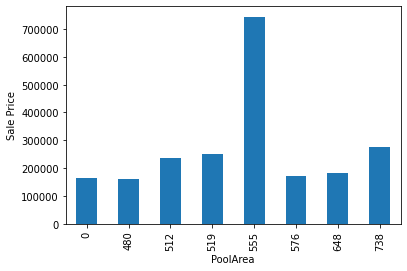

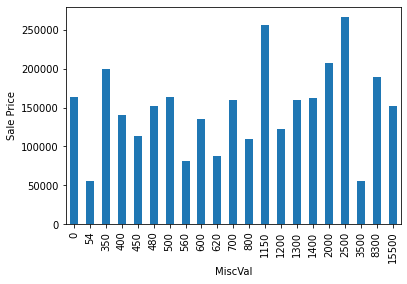

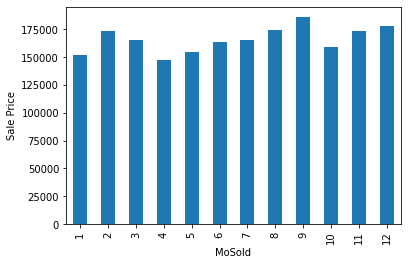

In [18]:
for feature in discrete_features:
    discrete_df = house_df.copy()
    discrete_df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel("Sale Price")
    plt.show()

In [19]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_features + ['Id']]
house_df[continuous_features]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


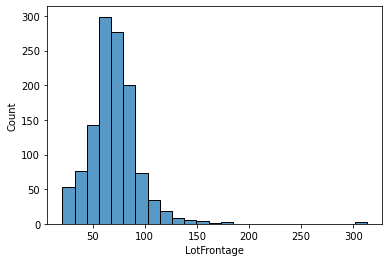

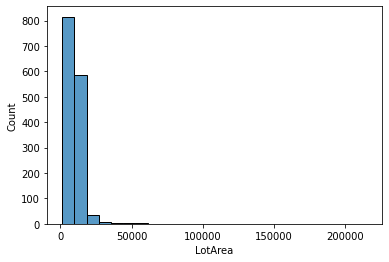

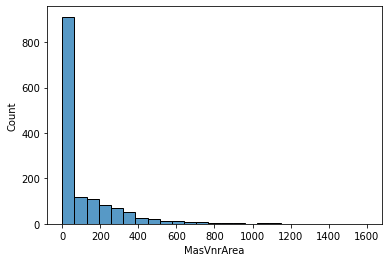

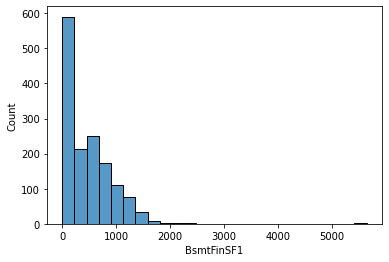

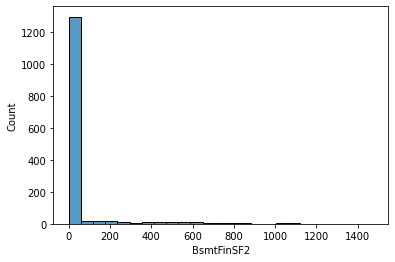

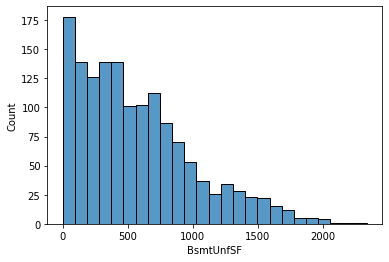

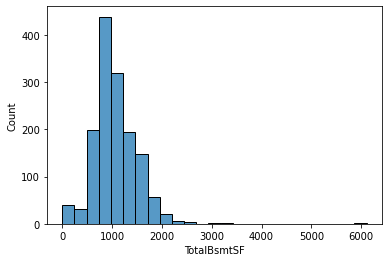

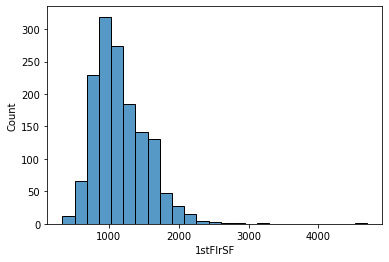

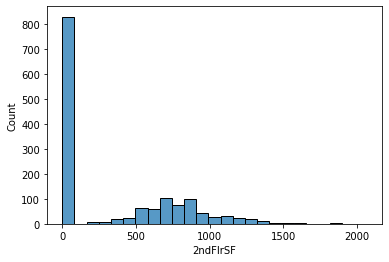

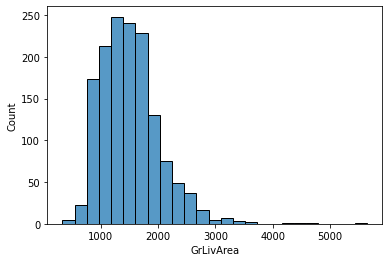

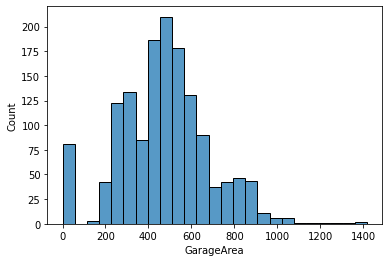

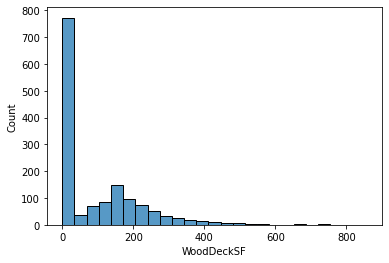

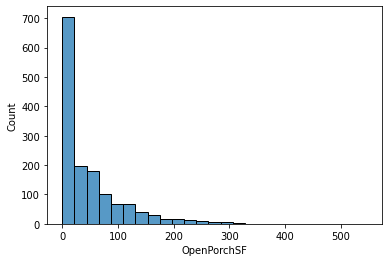

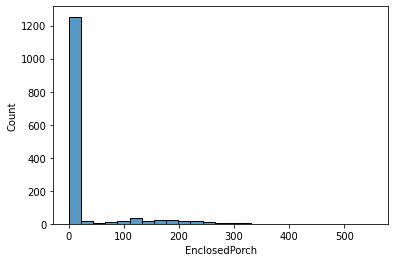

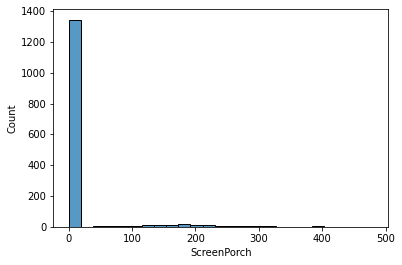

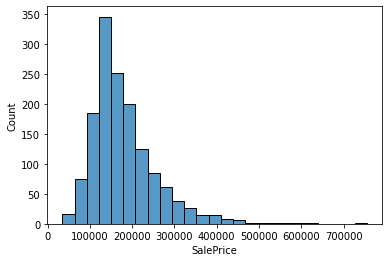

In [20]:
for feature in continuous_features:
    cont_df = house_df.copy()
    sns.histplot(cont_df[feature], bins=25)
    plt.show()

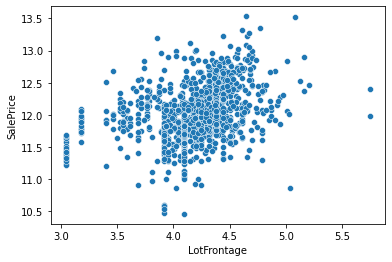

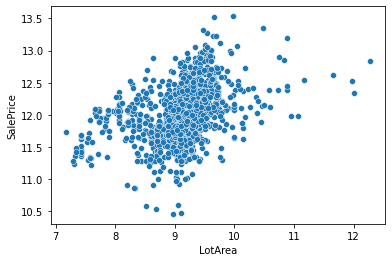

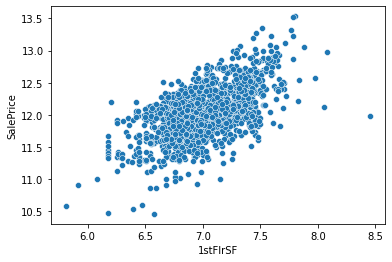

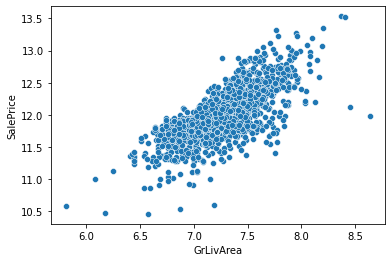

In [21]:
for feature in continuous_features:
    cont_df =  house_df.copy()
    if 0 in cont_df[feature].unique() or feature == 'SalePrice':
        pass
    else:
        cont_df[feature] = np.log(cont_df[feature])
        cont_df['SalePrice'] = np.log(cont_df['SalePrice'])
        sns.scatterplot(x=cont_df[feature], y=cont_df['SalePrice'])
        plt.show()

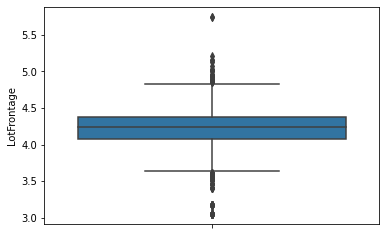

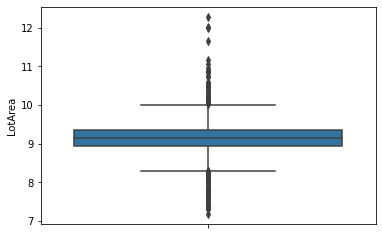

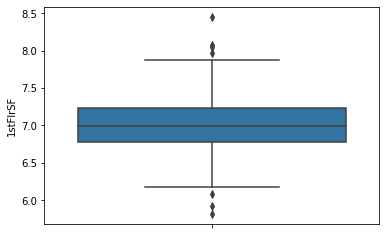

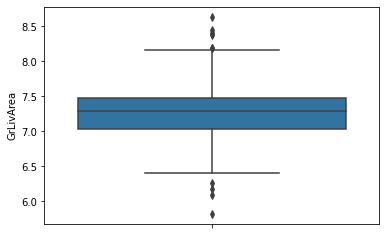

In [22]:
for feature in continuous_features:
    cont_df =  house_df.copy()
    if 0 in cont_df[feature].unique() or feature == 'SalePrice':
        pass
    else:
        cont_df[feature] = np.log(cont_df[feature])
        sns.boxplot(y=cont_df[feature])
        plt.show()

In [23]:
categorical_features = [feature for feature in house_df.columns if house_df[feature].dtypes == 'O']
house_df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [24]:
for feature in categorical_features:
    print('The Categorical feature: ', feature, '\tNo. of categories: ', len(house_df[feature].unique()))

The Categorical feature:  MSZoning 	No. of categories:  5
The Categorical feature:  Street 	No. of categories:  2
The Categorical feature:  Alley 	No. of categories:  3
The Categorical feature:  LotShape 	No. of categories:  4
The Categorical feature:  LandContour 	No. of categories:  4
The Categorical feature:  Utilities 	No. of categories:  2
The Categorical feature:  LotConfig 	No. of categories:  5
The Categorical feature:  LandSlope 	No. of categories:  3
The Categorical feature:  Neighborhood 	No. of categories:  25
The Categorical feature:  Condition1 	No. of categories:  9
The Categorical feature:  Condition2 	No. of categories:  8
The Categorical feature:  BldgType 	No. of categories:  5
The Categorical feature:  HouseStyle 	No. of categories:  8
The Categorical feature:  RoofStyle 	No. of categories:  6
The Categorical feature:  RoofMatl 	No. of categories:  8
The Categorical feature:  Exterior1st 	No. of categories:  15
The Categorical feature:  Exterior2nd 	No. of categorie

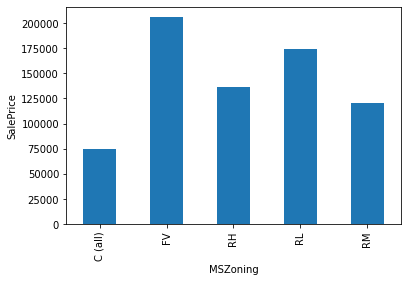

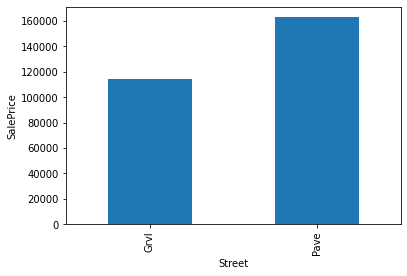

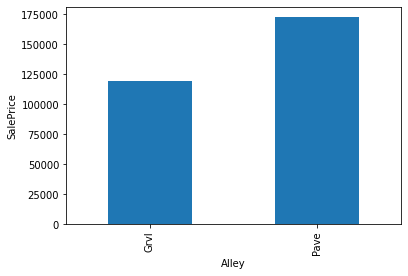

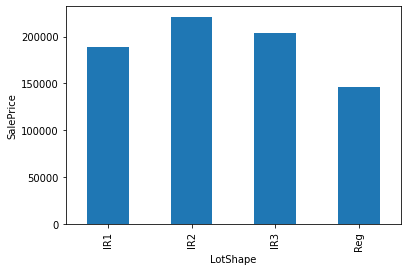

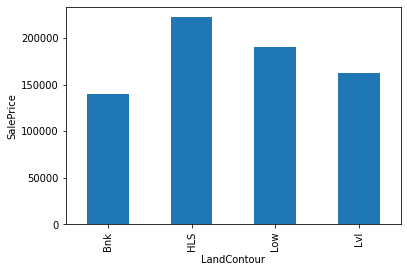

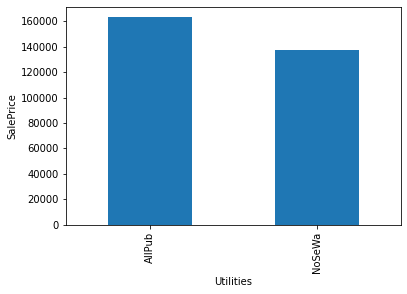

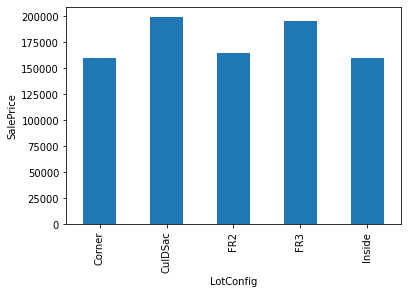

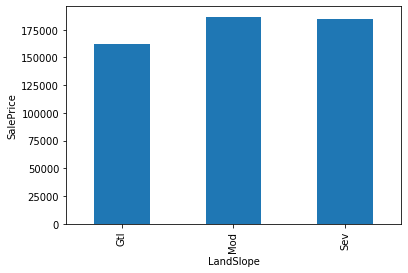

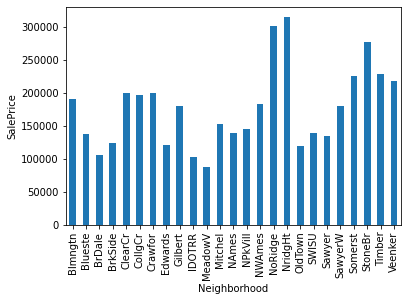

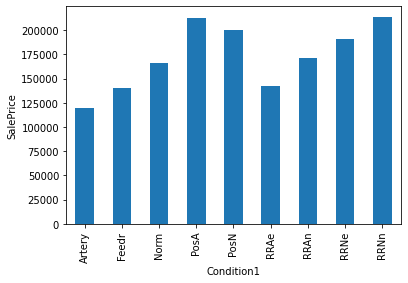

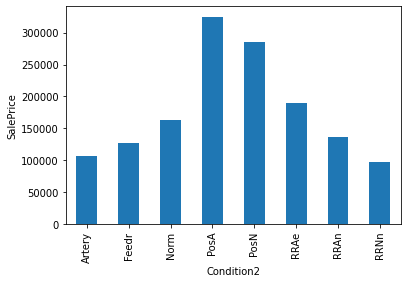

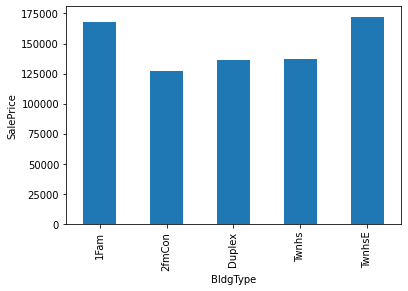

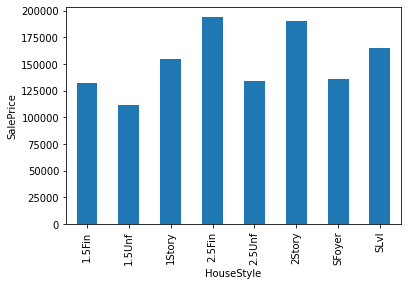

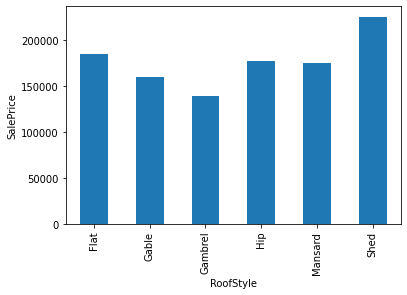

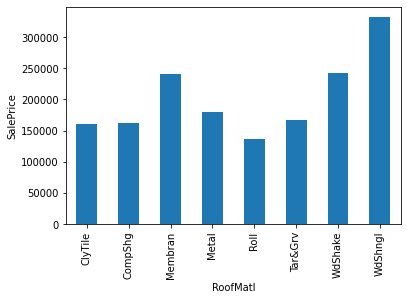

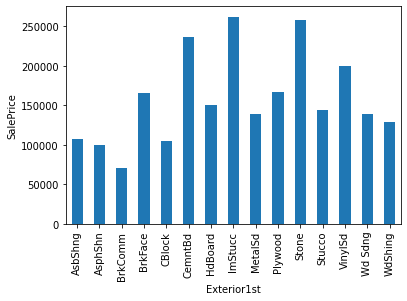

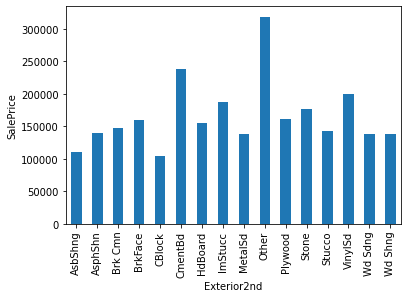

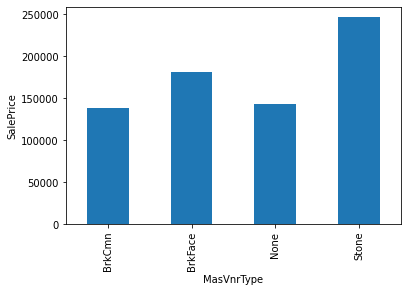

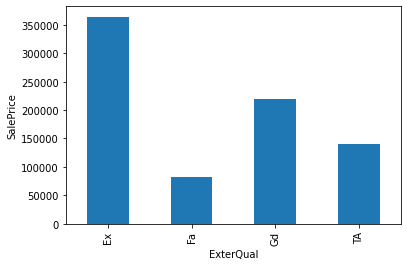

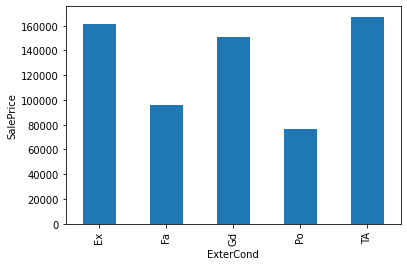

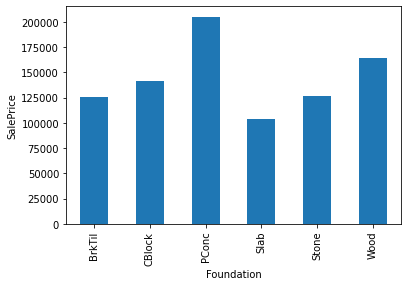

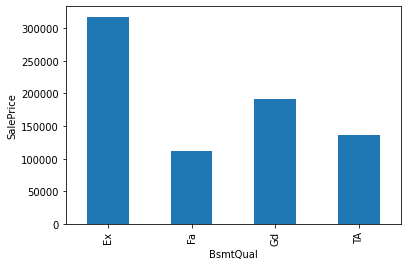

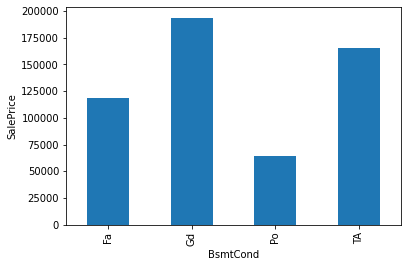

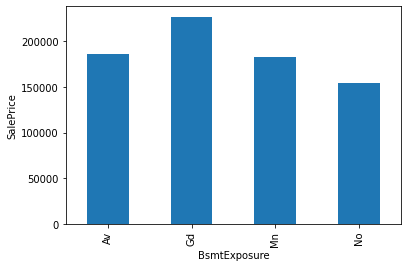

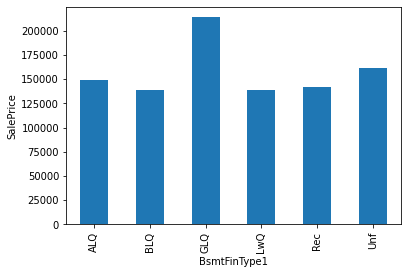

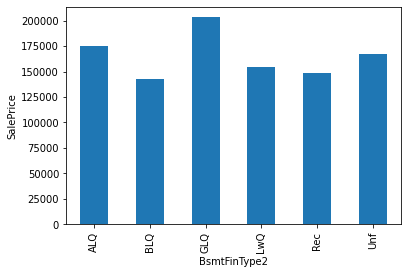

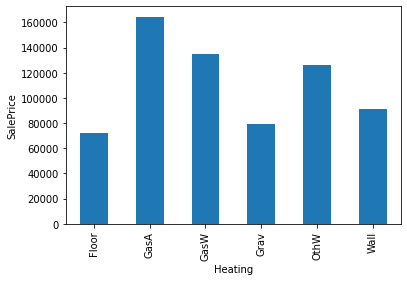

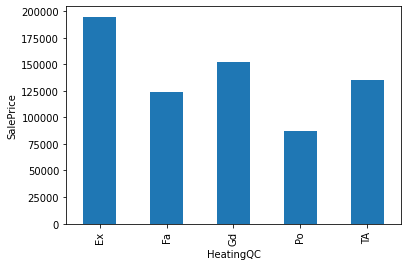

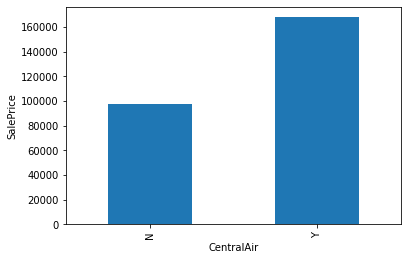

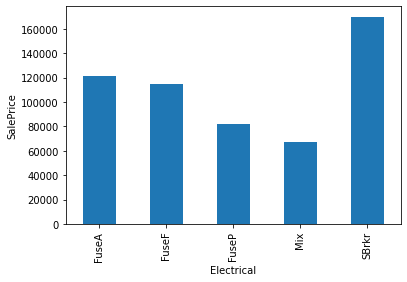

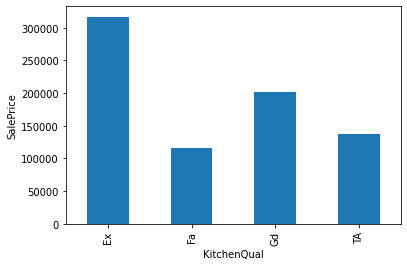

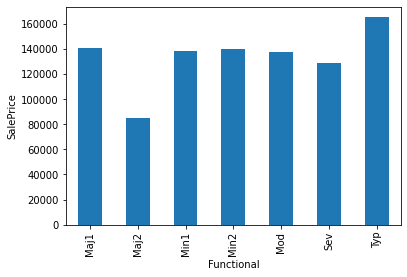

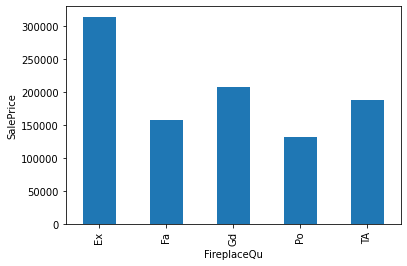

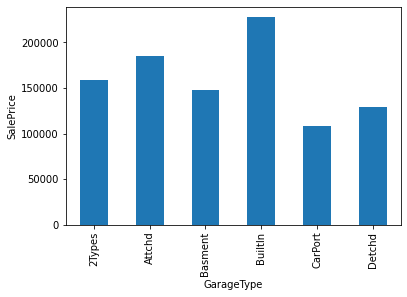

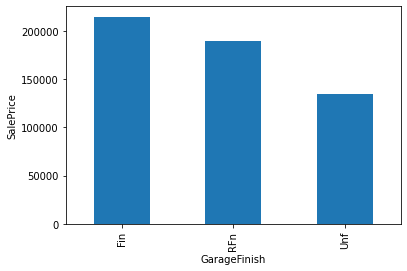

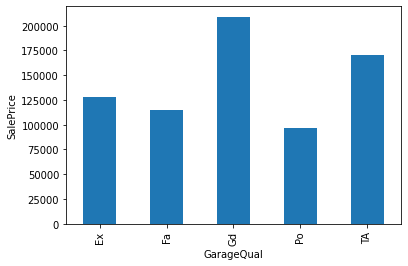

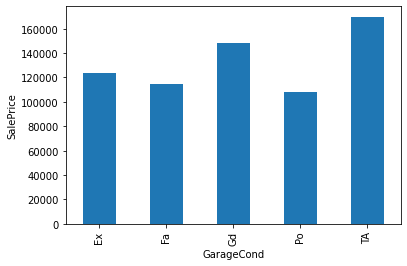

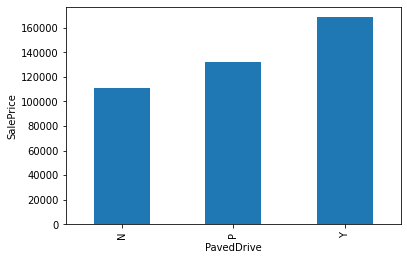

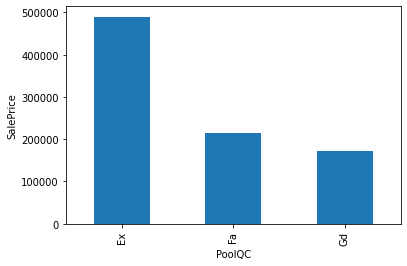

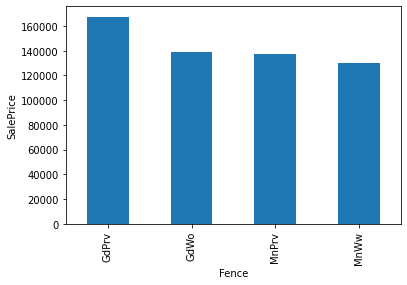

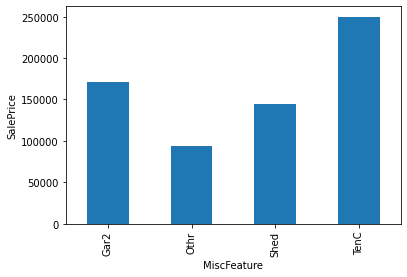

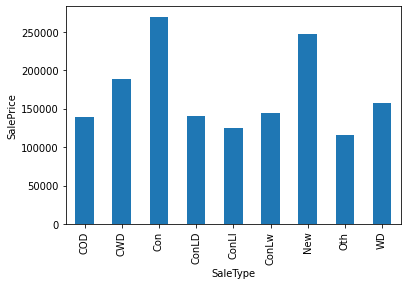

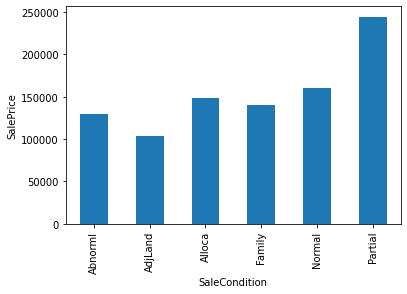

In [25]:
for feature in categorical_features:
    category_df = house_df.copy()
    category_df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.show()

In [26]:
categorical_features_with_na = [feature for feature in house_df.columns if house_df[feature].dtypes == 'O' and house_df[feature].isnull().sum()>0]
numerical_features_with_na = [feature for feature in house_df.columns if house_df[feature].dtypes != 'O' and house_df[feature].isnull().sum()>0]

In [27]:
for feature in numerical_features_with_na:
    house_df[feature+'Nan'] = np.where(house_df[feature].isnull(),1,0)
    house_df[feature].fillna(house_df[feature].median(), inplace=True)
    
house_df[numerical_features_with_na].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [28]:
house_df[categorical_features_with_na] = house_df[categorical_features_with_na].fillna("Missing")
house_df[categorical_features_with_na].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [29]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    house_df[feature] = house_df['YrSold']-house_df[feature]

In [30]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [31]:
num_feat = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea','SalePrice']
for feature in num_feat:
    house_df[feature] = np.log(house_df[feature])

In [32]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontageNan,MasVnrAreaNan,GarageYrBltNan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [33]:
for feature in categorical_features:
    temp = house_df.groupby(feature)['SalePrice'].count()/len(house_df)
    temp_df = temp[temp>0.01].index
    house_df[feature] = np.where(house_df[feature].isin(temp_df), house_df[feature], 'Rare_val')

In [34]:
for feature in categorical_features:
    labels_ordered=house_df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    house_df[feature]=house_df[feature].map(labels_ordered)

In [35]:
feature_scale = [feature for feature in house_df.columns if feature not in ['Id', 'SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(house_df[feature_scale])

MinMaxScaler()

In [36]:
data = pd.concat([house_df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(house_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [93]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFinSF1Nan,BsmtFinSF2Nan,BsmtUnfSFNan,TotalBsmtSFNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan,GarageCarsNan,GarageAreaNan
0,1461,0.000000,0.25,0.657288,0.614997,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.351478,0.000000,0.0,0.351478,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.50,0.662397,0.668388,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.512060,0.000000,0.0,0.512060,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.50,0.624887,0.660362,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.366144,0.376477,0.0,0.591552,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.50,0.646830,0.574520,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.365245,0.364125,0.0,0.585589,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.50,0.381547,0.382619,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.497143,0.000000,0.0,0.497143,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [38]:
data.to_csv('X_train_clean.csv')

In [39]:
y_train_clean = house_df[['SalePrice']]

In [40]:
X_train_clean = house_df.drop(['Id', 'SalePrice'], axis=1)

In [41]:
feature_select = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_select.fit(X_train_clean, y_train_clean)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [47]:
selected_feat = X_train_clean.columns[(feature_select.get_support())]

In [51]:
print('Total features:', len(X_train_clean.columns))
print('Selected features:', len(selected_feat))

Total features: 82
Selected features: 38


In [54]:
X_train_clean = X_train_clean[selected_feat]
X_train_clean.head()

,MSSubClass,MSZoning,LotArea,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Foundation,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleCondition
0,60,3,9.041922,0,14,5,7,5,5,5,10,4,1,706,0,150,856,4,6.752270,854,0,1,2,8,4,1,4,5.0,2,2,548,0,61,0,0,0,0,3
1,20,3,9.169518,2,11,3,6,8,31,31,4,2,4,978,0,284,1262,4,7.140453,0,0,0,1,6,4,3,4,31.0,2,2,460,298,0,0,0,0,0,3
2,60,3,9.328123,0,14,5,7,5,7,6,10,4,2,486,0,434,920,4,6.824374,866,0,1,2,6,4,3,4,7.0,2,2,608,0,42,0,0,0,0,3
3,70,3,9.164296,1,16,5,7,5,91,36,2,1,1,216,0,540,756,3,6.867974,756,0,1,2,7,4,4,2,8.0,1,3,642,0,35,272,0,0,0,0
4,60,3,9.565214,2,22,5,8,5,8,8,10,4,3,655,0,490,1145,4,7.043160,1053,0,1,2,9,4,3,4,8.0,2,3,836,192,84,0,0,0,0,3


In [143]:
test_data = pd.read_csv('../input/house-prices-dataset/test.csv')

In [144]:
categorical_features_with_na = [feature for feature in test_data.columns if test_data[feature].dtypes == 'O' and test_data[feature].isnull().sum()>0]
numerical_features_with_na = [feature for feature in test_data.columns if test_data[feature].dtypes != 'O' and test_data[feature].isnull().sum()>0]

In [145]:
for feature in numerical_features_with_na:
    test_data[feature+'Nan'] = np.where(test_data[feature].isnull(),1,0)
    test_data[feature].fillna(test_data[feature].median(), inplace=True)
    
test_data[numerical_features_with_na].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [146]:
test_data[categorical_features_with_na] = test_data[categorical_features_with_na].fillna("Missing")
test_data[categorical_features_with_na].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [147]:
for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    test_data[feature] = test_data['YrSold']-test_data[feature]

In [148]:
num_feat = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
for feature in num_feat:
    test_data[feature] = np.log(test_data[feature])

In [149]:
for feature in categorical_features:
    temp = test_data.groupby(feature)['Id'].count()/len(test_data)
    temp_df = temp[temp>0.01].index
    test_data[feature] = np.where(test_data[feature].isin(temp_df), test_data[feature], 'Rare_val')

In [150]:
for feature in categorical_features:
    labels_ordered=test_data.groupby([feature])['Id'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    test_data[feature]=test_data[feature].map(labels_ordered)

In [151]:
feature_scale = [feature for feature in test_data.columns if feature not in ['Id']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test_data[feature_scale])

MinMaxScaler()

In [152]:
data = pd.concat([test_data[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [153]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFinSF1Nan,BsmtFinSF2Nan,BsmtUnfSFNan,TotalBsmtSFNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan,GarageCarsNan,GarageAreaNan
0,1461,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [154]:
data.to_csv('X_test_clean.csv')

In [156]:
X_test_clean = data.drop(['Id'], axis=1)

In [157]:
X_test_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNan,MasVnrAreaNan,BsmtFinSF1Nan,BsmtFinSF2Nan,BsmtUnfSFNan,TotalBsmtSFNan,BsmtFullBathNan,BsmtHalfBathNan,GarageYrBltNan,GarageCarsNan,GarageAreaNan
0,0.000000,0.25,0.593445,0.566360,1.0,0.5,0.666667,0.000000,1.0,0.50,0.5,0.45,0.666667,0.0,0.75,0.0,0.444444,0.625,0.384615,0.822581,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.25,0.75,0.25,0.00,0.333333,0.116708,0.000000,0.094364,0.126168,0.173111,1.0,0.25,0.0,0.0,0.312253,0.000000,0.0,0.312253,0.000000,0.0,0.25,0.0,0.333333,0.5,0.75,0.166667,0.0,0.00,0.6,0.333333,0.792994,0.666667,0.2,0.490591,0.333333,0.000000,0.5,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,1.0,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.50,0.598957,0.622527,1.0,0.5,0.333333,0.000000,1.0,0.25,0.5,0.45,0.500000,0.0,0.75,0.0,0.555556,0.625,0.407692,0.870968,0.0,0.0,0.5,0.636364,0.25,0.083721,1.000000,0.333333,0.25,0.75,0.25,0.00,0.500000,0.230175,0.666667,0.000000,0.189720,0.260844,1.0,0.25,0.0,0.0,0.468253,0.000000,0.0,0.468253,0.000000,0.0,0.25,0.5,0.500000,0.5,0.50,0.250000,0.0,0.00,0.6,0.333333,0.802548,0.666667,0.2,0.209677,0.333333,0.000000,0.5,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.735294,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.50,0.558854,0.614005,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.444444,0.500,0.107692,0.225806,0.5,0.0,0.0,0.181818,0.50,0.000000,1.000000,0.333333,0.00,0.25,0.25,0.00,0.000000,0.197257,0.666667,0.000000,0.064019,0.182139,1.0,0.75,0.0,0.0,0.326139,0.376477,0.0,0.548792,0.000000,0.0,0.50,0.5,0.500000,0.5,0.75,0.250000,0.0,0.25,0.2,0.333333,0.678344,0.000000,0.4,0.323925,0.333333,0.000000,0.5,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,1.0,0.5,0.000000,0.181818,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.235294,0.50,0.582212,0.524583,1.0,0.5,0.333333,0.000000,1.0,0.50,0.5,0.00,0.500000,0.0,0.75,0.2,0.555556,0.625,0.100000,0.225806,0.5,0.0,0.0,0.181818,0.25,0.015504,1.000000,0.333333,0.00,0.75,0.25,0.00,0.000000,0.150125,0.666667,0.000000,0.151402,0.181747,1.0,0.00,0.0,0.0,0.325285,0.364125,0.0,0.542672,0.000000,0.0,0.50,0.5,0.500000,0.5,0.50,0.333333,0.0,0.25,0.0,0.333333,0.675159,0.000000,0.4,0.315860,0.333333,0.000000,0.5,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,0.5,0.5,0.000000,0.454545,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.588235,0.50,0.317987,0.335596,1.0,0.5,0.333333,0.666667,1.0,0.50,0.5,0.55,0.500000,0.0,0.00,0.0,0.777778,0.500,0.146154,0.322581,0.5,0.0,0.3,0.272727,0.50,0.000000,0.666667,0.333333,0.00,0.25,0.25,0.00,0.500000,0.065586,0.666667,0.000000,0.475234,0.251227,1.0,0.00,0.0,0.0,0.453388,0.000000,0.0,0.453388,0.000000,0.0,0.50,0.0,0.333333,0.5,0.50,0.166667,0.0,0.00,0.6,0.333333,0.694268,0.333333,0.4,0.340054,0.333333,0.000000,0.5,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,0.5,0.5,0.000000,0.000000,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,